# Bike Speed versus Grade

Like most people, I bike slower when I'm going up a steep hill than on a flat road. But how much slower?
To answer that, I downloaded data on my past rides 
from [Strava](https://www.strava.com/athletes/575579) and manipulated the `data` to create two lists, `X` holding the number of feet of climbing per mile for each ride, and `Y` holding the speed in miles per hour for each corresponding ride. (Notice that I only keep rides longer than 30 miles, so these should all be at a similar level of seriousness.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

def hours(sec):    return float(sec) / 60 / 60
def feet(meters):  return float(meters) * 100 / 2.54 / 12
def miles(meters): return feet(meters) / 5280
def getcsv(fname): return [r for r in csv.reader(open(fname)) if miles(r[0]) > 30]

# A file with three fields per line: distance (m), climb (m), elapsed time (sec)
data = getcsv('dist-climb-time.csv') 
X    = [feet(climb) / miles(dist) for (dist, climb, time) in data]
Y    = [miles(dist) / hours(time) for (dist, climb, time) in data]

Now I'll plot `X` versus `Y`, along with a best-fit polynomial to the points.
(I use a polynomial of degree two because the raw data looks like a curve, not a straight line,
and because a cubic polynomial seems like too many degress of freedom for y noisy data.)

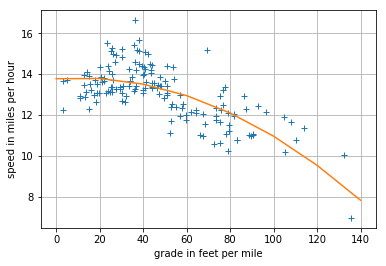

  0 ft/mile: 13.8 mph
 20 ft/mile: 13.8 mph
 40 ft/mile: 13.5 mph
 60 ft/mile: 13.0 mph
 80 ft/mile: 12.1 mph
100 ft/mile: 11.0 mph
120 ft/mile:  9.6 mph
140 ft/mile:  7.8 mph


In [2]:
def poly(X, Y, n):
    "Return best degree-n polynomial to fit X, Y data."
    C = np.polyfit(X, Y, n)[::-1] # Array of coefficients, reversed
    return lambda x: sum(C[i] * x ** i for i in range(n + 1))  

def show(X, Y, grades=range(0, 141, 20), degree=2): 
    plt.plot(X, Y, '+')
    F = poly(X, Y, degree)
    plt.plot(grades, [F(x) for x in grades], '-')
    plt.ylabel('speed in miles per hour')
    plt.xlabel('grade in feet per mile')
    plt.grid()
    plt.show()
    for g in grades:
        print('{:3} ft/mile: {:4.1f} mph'.format(g, F(g)))
             
show(X, Y)     

So, it looks like I go about 14 mph when the road is fairly flat, with a lot of variability from 12 to 16 mph, depending more on my level of effort than on the grade of the road. But from 60 ft/mile and up, speed falls off quickly at 1 mph for every 20 ft/mile, and by 140 ft/mile, I'm down to 7.8 mph. Note that 140 ft/mile is only 2.7% grade, but if you figure a typical route is 1/3 up, 1/3 down, and 1/3 flatish, then that's 8% grade on the up part.